In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii
from os import listdir
import os
from astropy.timeseries import LombScargle

In [20]:
key = pd.read_csv("C:/Users/60002/Documents/GitHub/learning/python_lessons/period_search_project/light_curves/key.csv")
ids = np.array(key["ID"])
default_path = "C:/Users/60002/Documents/GitHub/learning/python_lessons/period_search_project/light_curves/light_curves/***_r.csv"
default_plot_path = "C:/Users/60002/Documents/GitHub/learning/python_lessons/period_search_project/solutions/VD/plots"
best_periods = []
best_powers = []
best_ids = []
for id in ids:
    file_path = default_path.replace("***",id)
    if os.path.exists(file_path) ==True:
        data_frame = pd.read_csv(file_path)
        dates = np.array(data_frame['mjd'])
        mags = np.array(data_frame['mag'])
        frequencies,powers = LombScargle(dates,mags).autopower(minimum_frequency=.05, maximum_frequency = .5)
        periods = 1/frequencies
        #sorted_indices = np.argsort(powers)[::-1]
        best_index = np.argmax(powers)
        best_power = powers[best_index]
        best_period = periods[best_index]
        if best_power>.5:
            best_periods.append(best_period)
            best_powers.append(best_power)
            best_ids.append(id)
            #make plot
            phased_dates = np.mod(dates, best_period)/best_period
            plt.scatter(phased_dates,mags)
            plt.xlabel("phased dates")
            plt.ylabel("mags")
            plt.gca().invert_yaxis()
            plot_path = default_plot_path+"/" + id + ".png"
            plt.savefig(plot_path)
            plt.clf()
            plt.close()

In [22]:
print(best_ids)
zipped = list(zip(best_ids,best_periods,best_powers))
results_df = pd.DataFrame(zipped,columns=["ID","PERIOD","POWER"])
results_df.to_csv("results.csv",index=False)
results_df


['GDR1_2162134880959435904', 'GDR1_2162952711451794176', '2MASS_J20510029+4424364', 'GDR1_2162947591850664960', 'GDR1_2163135573981345152', 'GDR1_2162965012238950656', 'GDR1_2162221536218867072', 'GDR1_2162938074203123712', 'GDR1_2162251394832460672', 'GDR1_2163156052385630336', '2MASS_J20511252+4418093', '2MASS_J20523394+4429168', 'FHK_8', 'FHK_46', 'FHK_56', 'FHK_62', 'FHK_86', 'FHK_118', 'FHK_133', 'FHK_137', 'FHK_150', 'FHK_172', 'FHK_182', 'FHK_183', 'FHK_192', 'FHK_216', 'FHK_217', 'FHK_226', 'FHK_281', 'FHK_282', 'FHK_323', 'FHK_371', 'FHK_372', 'FHK_408', 'FHK_409', 'FHK_430', 'FHK_431', 'FHK_510', 'FHK_543', 'FHK_567', 'FHK_569', 'FHK_571']


,ID,PERIOD,POWER
0,GDR1_2162134880959435904,3.373496,0.659174
1,GDR1_2162952711451794176,8.251858,0.521033
2,2MASS_J20510029+4424364,7.011926,0.722993
3,GDR1_2162947591850664960,7.883323,0.557563
4,GDR1_2163135573981345152,7.368253,0.680215
5,GDR1_2162965012238950656,14.448254,0.714582
6,GDR1_2162221536218867072,18.969521,0.595207
7,GDR1_2162938074203123712,7.264413,0.535017
8,GDR1_2162251394832460672,6.423893,0.732519
9,GDR1_2163156052385630336,9.552761,0.749553


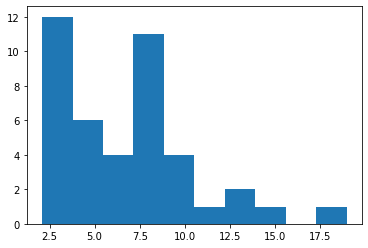

In [23]:
plt.hist(best_periods)
plt.show()
plt.plot(phased_dates,)

# np.argsort()
```python
old_array = [5,2,8]
sorted_indices = np.argsort(old_array) # = [1,0,2]
new_array = old_array[sorted_indices] # returns 2,5,8
```

ValueError: zero-size array to reduction operation maximum which has no identity